#Prototype Version

In [ ]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import ipywidgets as widgets

In [ ]:
df = pd.read_csv('WellbeingDataset.csv')

In [ ]:
#df.corr()
#df.info()
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,2.791510,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,1.367936,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [ ]:
X = df.iloc[20:,1:21].values
y = df.iloc[20:,23:24].values

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


#history = model.fit(X_train, y_train, epochs=100, batch_size=64)
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=70, batch_size=64)
model.save('saved_model/my_model')

Epoch 1/70
200/200 [==============================] - 1s 3ms/step - loss: 445733.9062 - mse: 445733.9062 - mae: 666.0834 - val_loss: 443910.5312 - val_mse: 443910.5312 - val_mae: 664.5983
Epoch 2/70
200/200 [==============================] - 0s 2ms/step - loss: 438163.9062 - mse: 438163.9062 - mae: 659.9947 - val_loss: 429485.3750 - val_mse: 429485.3750 - val_mae: 652.8248
Epoch 3/70
200/200 [==============================] - 0s 2ms/step - loss: 414332.5312 - mse: 414332.5312 - mae: 639.8975 - val_loss: 396055.5000 - val_mse: 396055.5000 - val_mae: 623.5158
Epoch 4/70
200/200 [==============================] - 0s 2ms/step - loss: 372152.1875 - mse: 372152.1875 - mae: 600.3397 - val_loss: 347577.9375 - val_mse: 347577.9375 - val_mae: 574.4164
Epoch 5/70
200/200 [==============================] - 0s 2ms/step - loss: 321354.3125 - mse: 321354.3125 - mae: 544.6106 - val_loss: 298654.4688 - val_mse: 298654.4688 - val_mae: 516.8362
Epoch 6/70
200/200 [==============================] - 0s 2ms

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


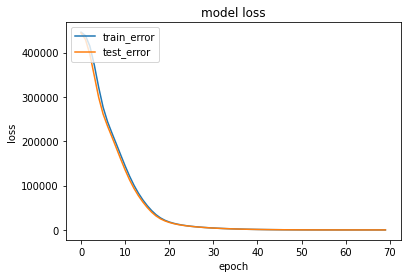

In [ ]:
#history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=50, batch_size=64)
#history = model.fit(X_test, y_test, epochs=50, batch_size=64)
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'][0:])
plt.plot(history.history['val_loss'][0:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_error', 'test_error'], loc='upper left')
plt.show()

100/100 [==============================] - 0s 1ms/step - loss: 1.0515 - mse: 1.0515 - mae: 0.1493
[1.0514817237854004, 0.14926424622535706]
Neural Network predicting test data:


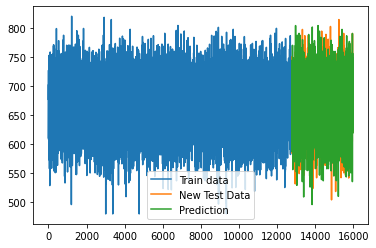

In [ ]:
pd.options.mode.chained_assignment = None

predicted_value = model.predict(X_test)
train_data=df[:12781]
test_data=df[12781:]
test_data['Predictions']=predicted_value
plt.plot(train_data["WORK_LIFE_BALANCE_SCORE"])
plt.plot(test_data[["WORK_LIFE_BALANCE_SCORE","Predictions"]])
plt.legend(["Train data","New Test Data","Prediction"])

print(model.evaluate(X_test, y_test)[1:])
print("Neural Network predicting test data:")

Looking closer at the 20 datas


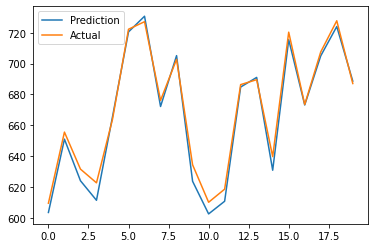

In [ ]:
#Upon closer look
prediction_data = sc.fit_transform(df.iloc[:20,1:21].values)
pred = np.array(model.predict(prediction_data))
plt.plot(pred)
plt.plot(df['WORK_LIFE_BALANCE_SCORE'][:20])
plt.legend(["Prediction", "Actual"])
print("Looking closer at the 20 datas")

In [ ]:
#Predicting Your Work Life Balance Score

layout = widgets.Layout(width='500px')
style = {'description_width':'initial'}
FRUITS_VEGGIES = widgets.IntSlider(value=5, max=10, style=style, layout=layout, description='Daily intake of fruits or veggies:')
DAILY_STRESS = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Relative daily stress:')
PLACES_VISITED = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Number of new places visited:')
CORE_CIRCLE = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Number of close friends:')
SUPPORTING_OTHERS = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many people do you help achieve a better life:')
SOCIAL_NETWORK = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many people do you interact with daily:')
ACHIEVEMENT = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Number of proud achievement:')
DONATION = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many times do you donate to charity:')
BMI_RANGE = widgets.IntSlider(value=1, min=1, max=2, style= style, layout=layout, description='Are you fit (1) or not fit (2):')
TODO_COMPLETED = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many TODOs have you completed:')
FLOW = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How good is your flow of life:')
DAILY_STEPS = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Amount of steps taken daily:')
LIVE_VISION = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How good is your eyesight:')
SLEEP_HOURS = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How much sleep do you get:')
LOST_VACATION = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many days of vacation do you lose:')
DAILY_SHOUTING = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How often do you shout or sulk:')
SUFFICIENT_INCOME = widgets.IntSlider(value=1, min=1, max=2, style= style, layout=layout, description='Do you/your family have sufficient income (1=No; 2=Yes):')
PERSONAL_AWARDS = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How many recognition (awards) do you have:')
TIME_FOR_PASSION = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='How much time do you have for your passion:')
WEEKLY_MEDITATION = widgets.IntSlider(value=5, max=10, style= style, layout=layout, description='Weekly, how many times do you reflect on yourself:')

display(FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION)

IntSlider(value=5, description='Daily intake of fruits or veggies:', layout=Layout(width='500px'), max=10, sty…

IntSlider(value=5, description='Relative daily stress:', layout=Layout(width='500px'), max=10, style=SliderSty…

IntSlider(value=5, description='Number of new places visited:', layout=Layout(width='500px'), max=10, style=Sl…

IntSlider(value=5, description='Number of close friends:', layout=Layout(width='500px'), max=10, style=SliderS…

IntSlider(value=5, description='How many people do you help achieve a better life:', layout=Layout(width='500p…

IntSlider(value=5, description='How many people do you interact with daily:', layout=Layout(width='500px'), ma…

IntSlider(value=5, description='Number of proud achievement:', layout=Layout(width='500px'), max=10, style=Sli…

IntSlider(value=5, description='How many times do you donate to charity:', layout=Layout(width='500px'), max=1…

IntSlider(value=1, description='Are you fit (1) or not fit (2):', layout=Layout(width='500px'), max=2, min=1, …

IntSlider(value=5, description='How many TODOs have you completed:', layout=Layout(width='500px'), max=10, sty…

IntSlider(value=5, description='How good is your flow of life:', layout=Layout(width='500px'), max=10, style=S…

IntSlider(value=5, description='Amount of steps taken daily:', layout=Layout(width='500px'), max=10, style=Sli…

IntSlider(value=5, description='How good is your eyesight:', layout=Layout(width='500px'), max=10, style=Slide…

IntSlider(value=5, description='How much sleep do you get:', layout=Layout(width='500px'), max=10, style=Slide…

IntSlider(value=5, description='How many days of vacation do you lose:', layout=Layout(width='500px'), max=10,…

IntSlider(value=5, description='How often do you shout or sulk:', layout=Layout(width='500px'), max=10, style=…

IntSlider(value=1, description='Do you/your family have sufficient income (1=No; 2=Yes):', layout=Layout(width…

IntSlider(value=5, description='How many recognition (awards) do you have:', layout=Layout(width='500px'), max…

IntSlider(value=5, description='How much time do you have for your passion:', layout=Layout(width='500px'), ma…

IntSlider(value=5, description='Weekly, how many times do you reflect on yourself:', layout=Layout(width='500p…

Click run to view your score

In [ ]:
def improve_wellbeing():
  if sum([FRUITS_VEGGIES.value,DAILY_STRESS.value,PLACES_VISITED.value,CORE_CIRCLE.value,SUPPORTING_OTHERS.value,SOCIAL_NETWORK.value,ACHIEVEMENT.value,DONATION.value,BMI_RANGE.value,TODO_COMPLETED.value,FLOW.value,DAILY_STEPS.value,LIVE_VISION.value,SLEEP_HOURS.value,LOST_VACATION.value,DAILY_SHOUTING.value,SUFFICIENT_INCOME.value,PERSONAL_AWARDS.value,TIME_FOR_PASSION.value,WEEKLY_MEDITATION.value]) == 92 and FRUITS_VEGGIES.value == 5 and DAILY_STRESS.value == 5:
    print(color.BOLD + "Welcome To Work/School Life Balance predictor, please fill the survey on top." + color.END)
  else:
    s_or_a = input("Are you a student or an adult?: ").lower()
    if "stu" in s_or_a: s_or_a = "School"
    elif "adu" in s_or_a: s_or_a = "Work"

    initial = list(df.iloc[:,1:21].values)
    initial.append(np.array([FRUITS_VEGGIES.value,DAILY_STRESS.value,PLACES_VISITED.value,CORE_CIRCLE.value,SUPPORTING_OTHERS.value,SOCIAL_NETWORK.value,ACHIEVEMENT.value,DONATION.value,BMI_RANGE.value,TODO_COMPLETED.value,FLOW.value,DAILY_STEPS.value,LIVE_VISION.value,SLEEP_HOURS.value,LOST_VACATION.value,DAILY_SHOUTING.value,SUFFICIENT_INCOME.value,PERSONAL_AWARDS.value,TIME_FOR_PASSION.value,WEEKLY_MEDITATION.value]))
    pred_array = sc.fit_transform(initial)
    prediction = model.predict(pred_array)[-1]

    print(f"\nThe {s_or_a}-Life Balance Score is divided into 3 categories:\n  a poor score is below 550, a good score is above 640, an excellent score is above 720.")
    print(f"\nYour {s_or_a} life balance score is {str(prediction)[1:-1]}\n\nHere are some ways that you can improve your wellbeing:")

    if FRUITS_VEGGIES.value <=4: print("  - Your FRUITS_VEGGIES is lower than expected, increasing it may increase your work life balance score")
    if DAILY_STRESS.value >=6: print("  - Your DAILY_STRESS is lower than expected, take some time to meditate, or take a deep breath in when you are stressed")
    if PLACES_VISITED.value <=4: print("  - Your PLACES_VISITED is lower than expected, explore some fascinating places nearby with a mask")
    if CORE_CIRCLE.value <= 0: print("  - Your CORE_CIRCLE is lower than expected, find a partner to share your thoughts and feelings")
    if SUPPORTING_OTHERS.value <=3: print("  - Your SUPPORTING_OTHERS is lower than expected, be more compassionate and help others more often")
    if SOCIAL_NETWORK.value <=5: print("  - Your SOCIAL_NETWORK is lower than expected, interacting with others may increase it")
    if ACHIEVEMENT.value <=4: print("  - Your ACHIEVEMENT is lower than expected, be more grateful in what you already have can improve your mindset on it")
    if DONATION.value <=4: print("  - Your DONATION is lower than expected, no matter how small, a gift from your heart is always priceless")
    if BMI_RANGE.value == 2: print("  - Your fitness level is not adequate, exercise more often and stand up in break time")
    if TODO_COMPLETED.value <=4: print("  - Your TODO_COMPLETED is lower than expected, manage your time properly and have better self-control")
    if FLOW.value <=4: print("  - Your life FLOW is lower than expected, altering your work and life sequence may help")
    if DAILY_STEPS.value <=4: print("  - Your DAILY_STEPS is lower than expected, move around once in a while to stretch")
    if LIVE_VISION.value <=4: print("  - Your LIVE_VISION is lower than expected, decrease your screen time and rest your eyes often")
    if SLEEP_HOURS.value <=6: print("  - Your SLEEP_HOURS is lower than expected, improving time management & listening to lofi music before bed can increase it")
    if LOST_VACATION.value >=6: print("  - Your LOST_VACATION is higher than expected, wait till the pandemic is over")
    if DAILY_SHOUTING.value >=5: print("  - Your DAILY_SHOUTING_SULKING is higher than expected, manage your temper and exhale when you are about to burst")
    if SUFFICIENT_INCOME.value == 1: print(f"  - You/Your family is destitute, retraining or finding other jobs may help")
    if PERSONAL_AWARDS.value <=5: print("  - Your PERSONAL_AWARDS is lower than expected, joining more competitions or reaching your goals can help increase it")
    if TIME_FOR_PASSION.value <=3: print("  - Your TIME_FOR_PASSION is lower than expected, find a job that suits your passion or have breaks to do your passion can help")
    if WEEKLY_MEDITATION.value <=4: print("  - Your SELF_REFLECTION is lower than expected, take some time to reflect yourself, maybe in the shower or before you sleep")
    print("\nThat's the prediction of your score, you can view the result of the neural network by scrolling up!")
improve_wellbeing()

Are you a student or an adult?: student

The School-Life Balance Score is divided into 3 categories:
  a poor score is below 550, a good score is above 640, an excellent score is above 720.

Your School life balance score is 661.749

Here are some ways that you can improve your wellbeing:
  - Your SOCIAL_NETWORK is lower than expected, interacting with others may increase it
  - Your SLEEP_HOURS is lower than expected, improving time management & listening to lofi music before bed can increase it
  - Your DAILY_SHOUTING_SULKING is higher than expected, manage your temper and exhale when you are about to burst
  - You/Your family is destitute, retraining or finding other jobs may help
  - Your PERSONAL_AWARDS is lower than expected, joining more competitions or reaching your goals can help increase it

That's the prediction of your score, you can view the result of the neural network by scrolling up!
